# Решение систем линейных уравнений в Python

## Пример 1. Система 2 уравнений
Рассмотрим простую систему из 2 линейных уравнений с 2 неизвестными:
\begin{matrix}
2x+5y=1 &(1)
\\
x-10y=3 &(2)
\end{matrix}

### Аналитическое решение
Система легко решается аналитически. Для этого достаточно выразить из уравнения (2) переменную x:

\begin{matrix}
x=3 + 10y &(3)
\end{matrix}
После чего подставить её в уравнение (1):
\begin{matrix}
2\cdot(3 + 10y)+5y=1,
\end{matrix}
и решить получившееся линейное уравнение относительно переменной y:
\begin{matrix}
25y+6=1 \\ 
\end{matrix}


\begin{matrix}
25y=-5 \\ 
\end{matrix}


\begin{matrix}
y=-0.2
\end{matrix}
Полученное значение y можно подставить в выражение для x в уравнение (3):
\begin{matrix}
x=3 + 10\cdot (-0.2)
\end{matrix}
и получить значение переменной x:
\begin{matrix}
x=1
\end{matrix}
Таким образом **решением системы будет: (1; -0,2)**

*(1-е значение в ответе - x, 2-е - y)*

### Решение матричным методом (python numpy)

Запишем исходную систему уравнений в виде матрицы (левая часть) и вектора (правая часть):
\begin{matrix}
2x+5y=1
\\
x-10y=3
\end{matrix}

Для этого выпишем по порядку все коэффициенты перед неизвестными в матрицу.

Коэффициент перед переменной х 1й строки на место в матрице с координатами 0,0. (2)

Коэффициент перед переменной y 1й строки на место в матрице с координатами 0,1. (5)

Коэффициент перед переменной х 2й строки на место в матрице с координатами 1,0. (1)

Коэффициент перед переменной y 2й строки на место в матрице с координатами 1,1. (-10)

\begin{pmatrix}
 2& 5
\\ 
1 & -10
\end{pmatrix}

Значение свободного члена (число, не умноженное ни на одну переменную системы) после знака равенства 1й строки на местро 0 в векторе.

Значение свободного члена 2й строки на местро 1 в векторе.

\begin{pmatrix}
1
\\ 
3
\end{pmatrix}

Для этого воспользуемся numpy массивами:

In [1]:
import numpy # импортируем библиотеку 

M1 = numpy.array([[2., 5.], [1., -10.]]) # Матрица (левая часть системы)
v1 = numpy.array([1., 3.]) # Вектор (правая часть системы)
#Запишем все числа с точкой, т.к. иначе в Python 2 они будут участвовать в целочисленных операциях (остатки от деления будут отбрасываться)

Для решения системы воспользуемся функцией numpy.linalg.solve модуля numpy (документация - http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.solve.html). Функция принимает на вход 2 параметра:

1й - матрица коэффициентов перед переменными

2й - вектор сободных членов

In [2]:
numpy.linalg.solve(M1, v1)

array([ 1. , -0.2])

Обратим внимание, что ответом так же вляется numpy массив!

при этом порядок следования ответов в массиве соответсвует порядку столбцов исходной матрицы. Т.е. на 0 месте находится x=1, т.к. мы в матрице внесли в 0 столбец коэффициенты перед переменной х!

**Ответ: (1; -0,2)**

## Пример 2. Система 4 уравнений
Рассмотрим простую систему из 2 линейных уравнений с 2 неизвестными:
\begin{matrix}
A + C = 2 &(4)
\\
-A + B - 2C + D = -2 &(5)
\\
4A + C - 2D = 0 &(6)
\\
-4A + 4B + D = 5 &(7)
\end{matrix}

Для наглядности решения данной системы матричным методом запишем её в таком виде, чтобы каждое уравнение содержало все 4 переменных, и чтобы они занимали в каждой строке одно и то же порядковое место (А - 0, B - 1, C - 2, D - 3):

\begin{matrix}
A + 0B + C + 0D = 2 &(8)
\\
-A + B - 2C + D = -2 &(9)
\\
4A + 0B + C - 2D = 0 &(10)
\\
-4A + 4B + 0C + D = 5 &(11)
\end{matrix}

теперь аналогично примеру 1 выпишем матрицу (коэффициенты перед переменными из левой части системы построчно в порядке следования переменных) и вектор (свободные члены из правой части системы):


\begin{pmatrix}
1 & 0 & 1 & 0
\\ 
-1 & 1 & -2 & 1
\\
4 & 0 & 1 & -2
\\
-4 & 4 & 0 & 1
\end{pmatrix}


\begin{pmatrix}
2
\\ 
-2
\\
0
\\
5
\end{pmatrix}

In [3]:
import numpy # импортируем библиотеку 

M2 = numpy.array([[1., 0., 1., 0.], [-1., 1., -2., 1.], [4., 0., 1., -2.], [-4., 4., 0., 1.]]) # Матрица (левая часть системы)
v2 = numpy.array([2., -2., 0., 5.]) # Вектор (правая часть системы)

numpy.linalg.solve(M2, v2)

array([ 0.,  1.,  2.,  1.])

**Ответ: (0; 1; 2; 1)**

*A = 0, B = 1, C =2, D = 1*

## Пример 3. Система 3 уравнений (с приведением к линейному виду)

Матричный метод применим только для решения линейных уравнений. Однако иногда можно встретить нелинейные уравнения, легко приводимые к линейной форме, например:

\begin{matrix}
2x_{1}+x_{2}^2+x_{3} = 2 &(12)
\\
x_{1}-x_{2}^2 = -2 &(13)
\\
3x_{1}-x_{2}^2+2x_{3} = 2 &(14)
\end{matrix}

Можно заметить что переменная x2 входит во все 3 уроавнения только в квадратичной форме. Это означает, что мы можем осуществить замену:

\begin{matrix}
x_{2}^2 = a &(15)
\end{matrix}

С учётом этой подстановки запишем систему, аналогично примеру 2 с вхождением всех 3 переменных:

\begin{matrix}
2x_{1}+a+x_{3} = 2 &(16)
\\
x_{1}-a+0x_{3} = -2 &(17)
\\
3x_{1}-a+2x_{3} = 2 &(18)
\end{matrix}

Для новой системы мы уже умеем записывать матрицу (коэффициенты перед переменными из левой части системы) и вектор (свободные члены из правой части):

\begin{pmatrix}
2 & 1 & 1
\\ 
1 & -1 & 0
\\
3 & -1 & 2
\end{pmatrix}

\begin{pmatrix}
2
\\
-2
\\
2
\end{pmatrix}

In [4]:
import numpy # импортируем библиотеку 

M3 = numpy.array([[2., 1., 1.], [1., -1., 0.], [3., -1., 2.]]) # Матрица (левая часть системы)
v3 = numpy.array([2., -2., 2.]) # Вектор (правая часть системы)

numpy.linalg.solve(M3, v3)

array([-1.,  1.,  3.])

Мы получили промежуточный результат:

$x_{1}= -1, a= 1, x_{3}= 3,$

или

$x_{1}= -1, x_{2}^2= 1, x_{3}= 3,$

$x_{2}^2=1$ соответсвует 2 значениям $x_{2}$: 1 и -1.

Таким образом мы получаем 2 решения нашей системы: $x_{1}= -1, x_{2}= 1, x_{3}= 3,$ и $x_{1}= -1, x_{2}= -1, x_{3}= 3,$

**Ответ: (-1; 1; 3) и (-1; -1; 3)**

### Пример 4. Решение простой задачи с помощью системы линейных уравнений.

Навстречу друг другу из одного города в другой, расстояние между которыми составляет 30 км, едут два велосипедиста. Предположим, что если велосипедист 1 выедет на 2 ч раньше своего товарища, то они встретятся через 2,5 часа после отъезда велосипедиста 2; если же велосипедист 2 выедет 2мя часами ранее велосипедсита 1, то встреча произойдет через 3 часа после отъезда первого. С какой скоростью движется каждый велосипедист?

Обозначим за неизвестные x и y скорости велосипедистов.

Путь = скорость * время

Расстояние между велосипедистами = путь 1 велосипедиста + путь 2 велосипедиста

На основании этих простых рассуждений и данных задачи можно записать уравнения:

\begin{matrix}
(2.5 + 2)x+2.5y=30 &(19)
\\
3x + (3+2)y=30 &(20)
\end{matrix}

или

\begin{matrix}
4.5x+2.5y=30 &(21)
\\
3x + 5y=30 &(22)
\end{matrix}

Аналогично примеру 1 легко составим матрицу коэффициентов перед неизвестными (левая часть системы) и вектор со свободными членами (права часть системы):

\begin{pmatrix}
 4.5& 2.5
\\ 
3 & 5
\end{pmatrix}

\begin{pmatrix}
 30
\\ 
 30
\end{pmatrix}

In [5]:
import numpy # импортируем библиотеку 

M4 = numpy.array([[4.5, 2.5], [3., 5.]]) # Матрица (левая часть системы)
v4 = numpy.array([30., 30.]) # Вектор (правая часть системы)

numpy.linalg.solve(M4, v4)

array([ 5.,  3.])

** Ответ: 5км/ч и 3км/ч**

### Пример 5. Нахождение уравнения плоскости по точкам, через которые она проходит.
Уравнение плоскости в 3-х мерном пространстве задаётся уравнением:
\begin{matrix}
z = ax + by + c & (23)
\end{matrix}
Уравнение плоскости однозначно задаётся 3 точками через которые она проходит.

Таким образом легко понять, что если мы знаем координаты точек, через которые проходит плоскость, то в уравнении (23) у вас 3 переменных: a, b, c. А значения x, y, z нам известны для 3 точек.

Если плоскость проходит через точки (1;-6;1), (0;-3;2) и (-3;0;-1), то мы легко можем найти коэффициенты, подставив значения соответсвующих координат для всех 3 точек в уравнение (23) и получив систему из 3 уравнений.

Для точки x = 1, y = -6, z = 1:
\begin{matrix}
a\cdot 1 + b\cdot (-6) + c = 1 &(24)
\end{matrix}

Для точки x = 0, y = -3, z = 2:
\begin{matrix}
a\cdot 0 + b\cdot (-3) + c = 2 &(25)
\end{matrix}

Для точки x = -3, y = 0, z = -1:
\begin{matrix}
a\cdot (-3) + b\cdot 0 + c = -1 &(26)
\end{matrix}

На основании системы уравнений (24), (25), (26) можно записать матрицу коэффициентов перед неизвестными (левая часть матрицы):

\begin{pmatrix}
1& -6 & 1
\\ 
0 & -3 & 1
\\ 
-3 & 0 & 1
\end{pmatrix}

И вектор свободных членов (правая часть):
\begin{pmatrix}
1
\\ 
2
\\
-1
\end{pmatrix}

In [6]:
import numpy # импортируем библиотеку 

M5 = numpy.array([[1., -6., 1.], [0., -3., 1], [-3, 0, 1]]) # Матрица (левая часть системы)
v5 = numpy.array([1., 2., -1.]) # Вектор (правая часть системы)

numpy.linalg.solve(M5, v5)


array([ 2.,  1.,  5.])

**Ответ: уравнение искомой плоскости в пространстве задаётся уравнением $z = 2x + y + 5$**

### Пример 6. Нахождение уравнения параболы по 2 точкам и касательной

Найти уравнение паработы ($f(x) = ax^2 + bx + x & (27)$), проходящей через точки (1,1) и (-1,1) и касающейся биссектрисы 1й координатной четверти.

Как и в предыдущем примере неизвестными для нас являются коэффициенты a, b, c.

Подставив в уравнение параболы (27) значения аргумента (x) и функции (f(x)) получим 2 уравнения:

\begin{matrix}
a\cdot 1^2 + b\cdot 1 + c = 1 &(28)
\\
a\cdot (-1)^2 + b\cdot (-1) + c = 1 &(29)
\end{matrix}

Однако для нахождения 3 неизвестных 2 уравнений мало. Необходимо найти ещё одно из оставшихся условий.

Касание биссектрисы 1й координатной четверти означает, что наша парабола имеет касательную $y = x$. Если посмотреть на услвоие задачи, то мы увидим, что одна из точек (1, 1) лежит на этой прямой. Это означает, что мы знаем точку касания.

Уравнение прямой, делящей 1-ю координатную четверть пополам (биссектрисы) имеет вид $y = kx \quad (30)$

При этом мы знаем, что угол уравнения касательной (коэффициент k уравнения (30)) равен производной от функции (27) в точке касания.

\begin{matrix}
f'(x) = 2ax + bx & (31)
\end{matrix}

Подставив значение аргумента (x = 1) в точке касания и коэффициента (k = 1 в качестве производной f'(x)) 

\begin{matrix}
1 = 2a\cdot1 + b\cdot1 & (32)
\end{matrix}

Используя уравнения (28), (29) и (32), запишем полную систему уравнений, которую нам необходимо решить:

\begin{matrix}
a\cdot 1 + b\cdot 1 + c \cdot 1 = 1 &(33)
\\
a\cdot 1 + b\cdot (-1) + c \cdot 1 = 1 &(34)
\\
a\cdot 2 + b\cdot 1 + c \cdot 0 = 1 &(35)
\end{matrix}

По привычной уже схеме запишем коэффициенты перед переменными (левую часть системы) в матрицу, а свободные члены (правую часть) в вектор:

\begin{pmatrix}
1& 1 & 1
\\ 
1 & -1 & 1
\\ 
2 & 1 & 0
\end{pmatrix}

\begin{pmatrix}
1
\\ 
1
\\ 
1
\end{pmatrix}

In [7]:
import numpy # импортируем библиотеку 

M6 = numpy.array([[1., 1., 1.], [1., -1., 1], [2, 1, 0]]) # Матрица (левая часть системы)
v6 = numpy.array([1., 1., 1.]) # Вектор (правая часть системы)

numpy.linalg.solve(M6, v6)

array([ 0.5, -0. ,  0.5])

**Ответ: уравнение искомой параболы задаётся функцией $f(x) = 0.5x^2 + 0.5$**

#### Примечание к примеру 6
На иллюстрации ниже изображены графики параболы и биссектрисы, которой она касается. А так же 2 точки, через которых проходит парабола.

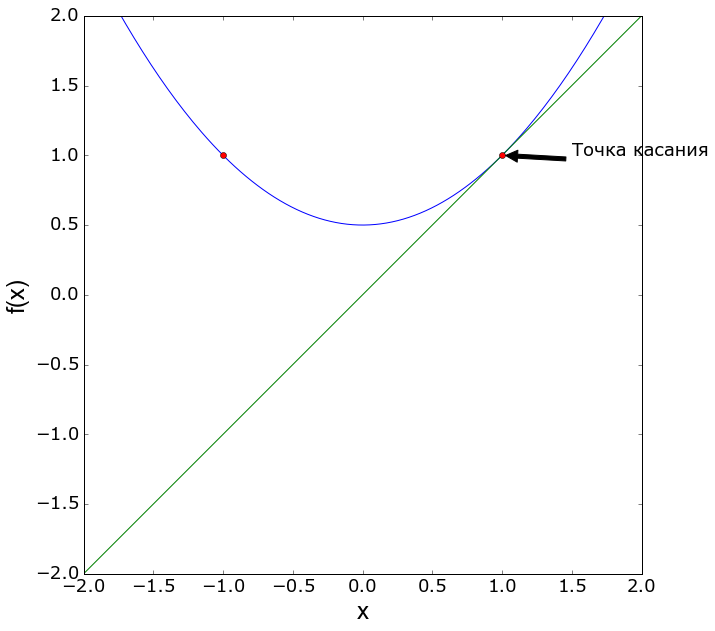

In [8]:
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
% matplotlib inline

mpl.rc('font', family='Verdana', size= 18)

w = numpy.linalg.solve(M6, v6) # запишем найденные коэффициенты в переменную
def f(x):
    return w[0]*x**2 + w[1]*x + w[2] # уравнение параболы

mpl.rcParams['figure.figsize'] = [10,10]
x = numpy.linspace(-2,2,200)
plt.axis([-2., 2., -2., 2.])
plt.plot(x, f(x), x, x)
plt.xlabel(u'x',{'fontname':'Arial', 'size': 24})
plt.ylabel(u'f(x)',{'fontname':'Arial', 'size': 24})
plt.annotate('Точка касания', xy=(1, 1), xytext=(1.5, 1.),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.plot([-1, 1], [1, 1], 'ro')